In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

## Dataset
Illustrate line plots using stock data using pandas_datareader. Note yahoo finance API is not accurate or reliable, we use it for demonstration ONLY

In [3]:
iris = sns.load_dataset('iris')
iris.shape
iris.describe()
iris.head()

(150, 5)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Probability distribution plots
- histogram
- kdeplot
- jointplot

### Histogram
- matplotlib, more flexible
- seaborn, not very useful for only histgram
- pandas, more convenient

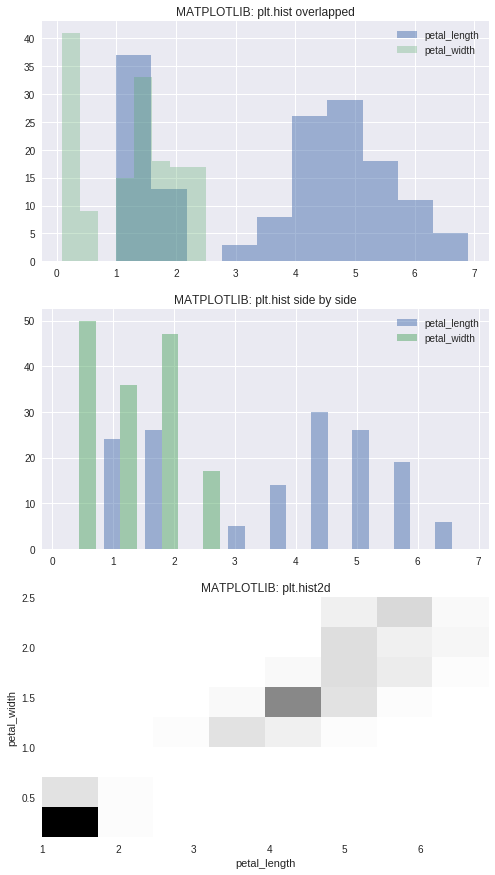

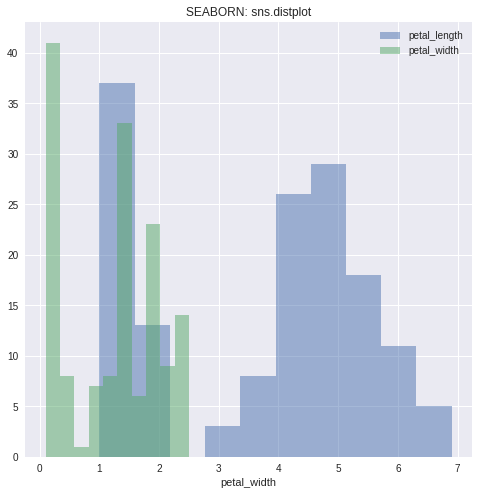

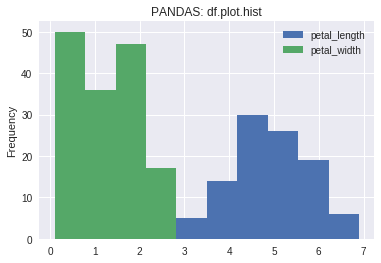

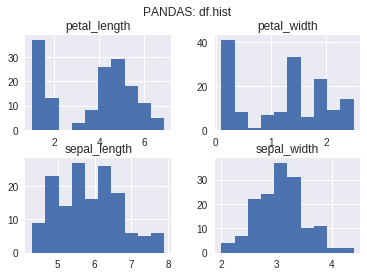

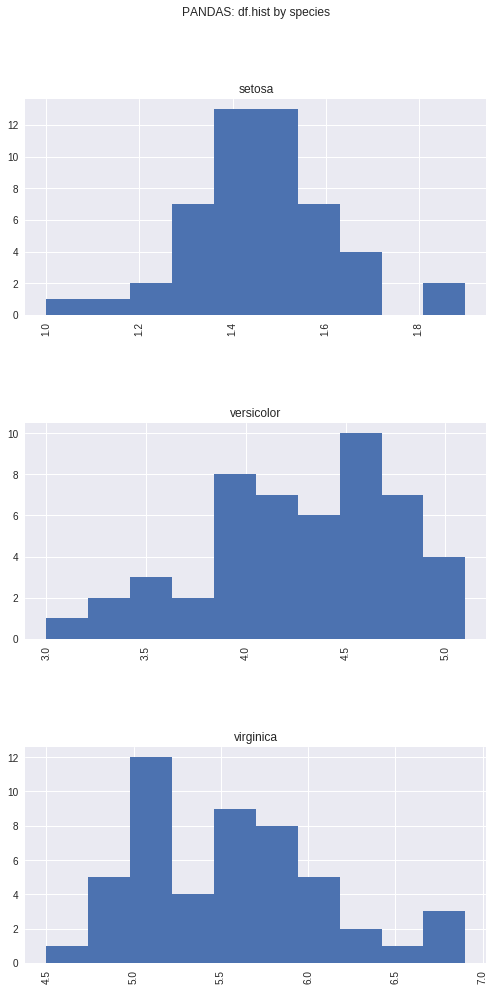

In [22]:
x_col, y_col = 'petal_length', 'petal_width'
x1_col, y1_col = 'sepal_length', 'sepal_width'
target = 'species'

# matplot hist and hsit2d
fig, axes=plt.subplots(3, 1, figsize=(8,15));
axes[0].hist(iris[x_col], alpha=0.5, label=x_col);
axes[0].hist(iris[y_col], alpha=0.3, bins=8, label=y_col);
axes[0].legend();
axes[0].set_title('MATPLOTLIB: plt.hist overlapped');

axes[1].hist([iris[x_col], iris[y_col]], alpha=0.5, label=[x_col, y_col]);
axes[1].legend();
axes[1].set_title('MATPLOTLIB: plt.hist side by side');

axes[2].hist2d(iris[x_col], iris[y_col], bins=8, density=True);
axes[2].set_xlabel(x_col);
axes[2].set_ylabel(y_col);
axes[2].set_title('MATPLOTLIB: plt.hist2d');


# seaborn distplot setting kde=False
fig, axes=plt.subplots(1, 1, figsize=(8,8));
sns.distplot(iris[x_col], kde=False, hist_kws=dict(alpha=0.5), bins=10, label=x_col, ax=axes);
sns.distplot(iris[y_col], kde=False, hist_kws=dict(alpha=0.5), bins=10, label=y_col, ax=axes);
axes.legend();
axes.set_title('SEABORN: sns.distplot');


# pandas hist plot
# all numerical columns in one plot
iris[[x_col, y_col]].plot.hist();
plt.title('PANDAS: df.plot.hist');
# one column, one subplot
iris.hist();
plt.suptitle('PANDAS: df.hist');
# group by 'species'
iris.hist(column=x_col, by='species', figsize=(8,16), layout=(3,1))
plt.suptitle('PANDAS: df.hist by species');

### KDE plot
- matplotlib, does not support
- seaborn, no easy way to apply hue mechnism, 2D KDE is useful
- pandas, no easy way to apply hue mechnism

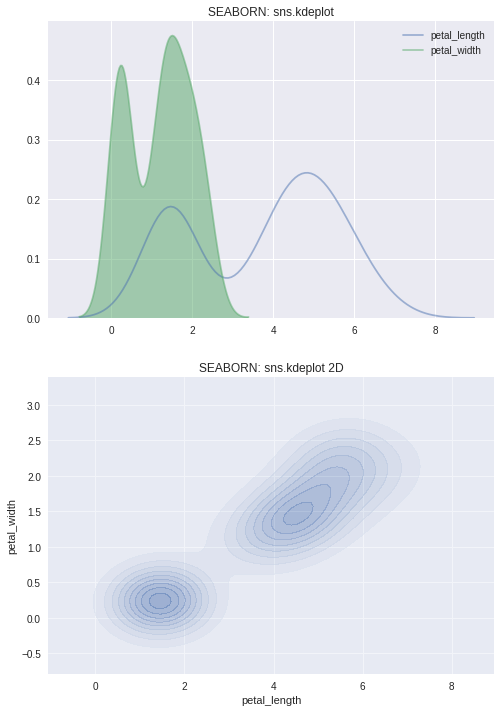

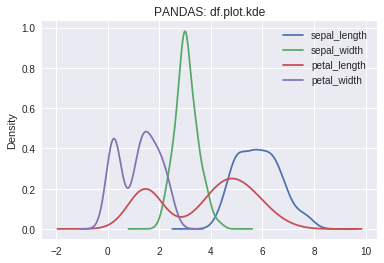

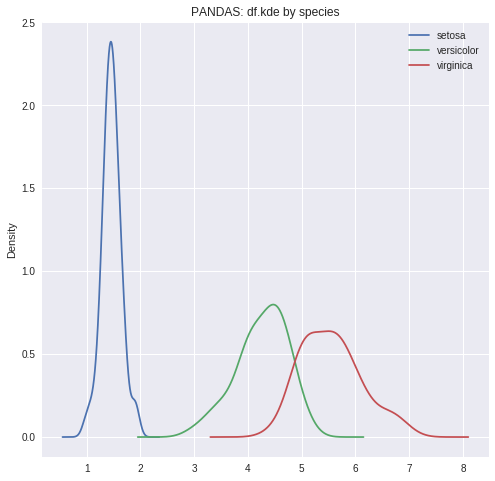

In [6]:
# seaborn distplot setting kde=False
fig, axes=plt.subplots(2, 1, figsize=(8,12));
sns.kdeplot(iris[x_col], alpha=0.5, label=x_col, ax=axes[0]);
sns.kdeplot(iris[y_col], alpha=0.5, shade=True, label=y_col, ax=axes[0]);
axes[0].legend();
axes[0].set_title('SEABORN: sns.kdeplot');
sns.kdeplot(iris[x_col], iris[y_col], alpha=0.5, shade=True, ax=axes[1]);
axes[1].set_title('SEABORN: sns.kdeplot 2D');


# pandas hist plot
# all numerical columns in one plot
#iris[[x_col, y_col]].plot.kde();
iris.plot.kde();
plt.title('PANDAS: df.plot.kde');
# group by 'species'
fig, ax = plt.subplots(1,1, figsize=(8, 8))
#iris.plot.kde(column=x_col, by='species', figsize=(8,16), layout=(3,1));
for species, grp in iris[[x_col, 'species']].groupby('species'):
    grp[x_col].plot.kde(label=species, ax=ax);
ax.legend();
ax.set_title('PANDAS: df.kde by species');

### Distribution plot
- seaborn ONLY, histgram + kde plot

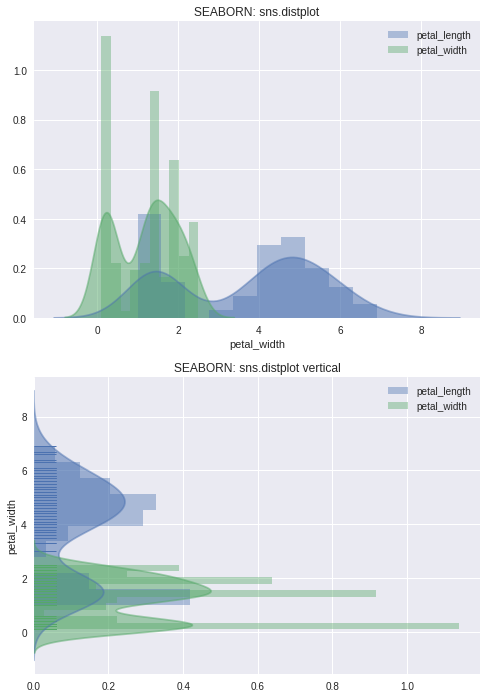

In [15]:
fig, axes=plt.subplots(2, 1, figsize=(8,12));
sns.distplot(iris[x_col], bins=10, kde_kws=dict(alpha=0.5, shade=True), label=x_col, ax=axes[0]);
sns.distplot(iris[y_col], bins=10, kde_kws=dict(alpha=0.5, shade=True), label=y_col, ax=axes[0]);
axes[0].legend();
axes[0].set_title('SEABORN: sns.distplot');
sns.distplot(iris[x_col], bins=10, kde_kws=dict(alpha=0.5, shade=True), vertical=True, rug=True, label=x_col, ax=axes[1]);
sns.distplot(iris[y_col], bins=10, kde_kws=dict(alpha=0.5, shade=True), vertical=True, rug=True, label=y_col, ax=axes[1]);
axes[1].legend();
axes[1].set_title('SEABORN: sns.distplot vertical');

### Joint distribution plot
Draw a plot of two variables with bivariate and univariate graphs.
- seaborn ONLY, does not support hue and ax

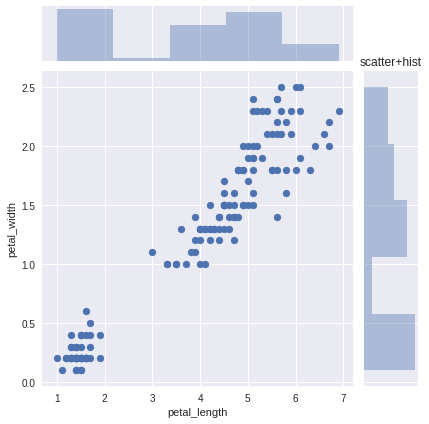

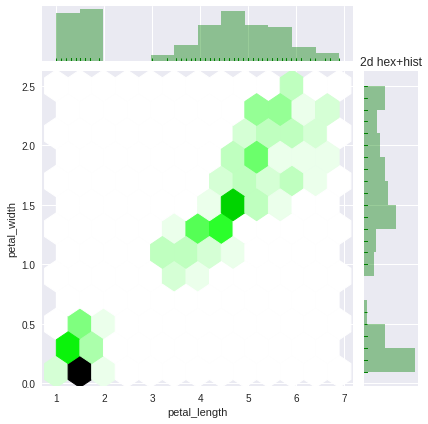

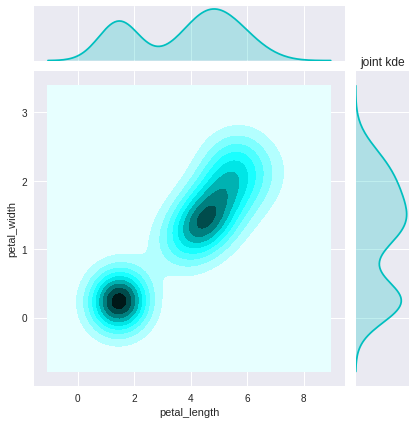

In [39]:
#default, marginal: histogram, joint: scatter
sns.jointplot(data=iris, x=x_col, y=y_col);
plt.title('scatter+hist');
sns.jointplot(data=iris, x=x_col, y=y_col, kind='hex', color='g', joint_kws={"gridsize":12}, marginal_kws=dict(bins=12, rug=True));
plt.title('2d hex+hist');
sns.jointplot(data=iris, x=x_col, y=y_col, kind='kde', color='c');
plt.title('joint kde');